# **Customer Spending Behavior Prediction**

## **Introduction**
Understanding customer behavior is essential for businesses aiming to improve **marketing strategies**, **customer retention**, and overall **decision-making**. This project focuses on using **data-driven machine learning techniques** to analyze and predict customer spending habits.

## **Objective**
The primary goal of this project is to build a **predictive model** that estimates a customer's **Spending Score** by analyzing key demographic and behavioral metrics such as:

- **Age**
- **Annual Income**
- **Gender**
- **Purchase Frequency**
- Other behavioral metrics

By leveraging these features, the model aims to uncover insights into customer spending patterns and provide actionable recommendations.

---

## **Summary**
1. **Problem Statement**:
   Businesses need to understand **spending behavior** to optimize their resources, retain high-value customers, and improve ROI on marketing efforts. This project addresses this challenge by analyzing customer data.

2. **Approach**:
   - Implemented a **linear regression model** as a baseline supervised learning technique.
   - Preprocessed data to handle missing values, normalize features, and encode categorical variables.
   - Evaluated performance using **Mean Squared Error (MSE)** and **R-squared** metrics.
   - Extended analysis with **polynomial regression** (quadratic and cubic) to capture non-linear patterns.

3. **Outcome**:
   - Developed a model capable of estimating customer **Spending Scores** with improved accuracy.
   - Gained insights into how features like **Age** and **Income** influence spending behavior.
   - Visualized trends and variability across demographic groups, providing actionable business insights.

---

## **Significance**
This analysis provides a valuable foundation for data-driven decision-making in customer segmentation and marketing. Businesses can use these insights to:
- **Target** specific customer segments with tailored campaigns.
- **Identify** high-value customers for loyalty programs or premium services.
- **Optimize** marketing budgets by focusing on impactful customer groups.

By enhancing their understanding of customer behavior, businesses can improve customer satisfaction and boost revenue growth.


In [98]:
## IMPORTS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load the dataset

file_path = "Mall_Customers.csv"
data = pd.read_csv(file_path)
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
# Structure of that Data Set;

print(data.info())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [9]:
# Data Cleaning

# Check for missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
data.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

In [13]:
# Convert specific rows in numerical columns to float and update the column type
rows_to_convert = [0, 2, 3, 4]
columns_to_convert = ['Age', 'Annual Income', 'Spending Score']  # Replace with your column names

# Convert specific rows and ensure the entire column is of type float
for col in columns_to_convert:
    data.loc[rows_to_convert, col] = data.loc[rows_to_convert, col].astype(float)
    data[col] = data[col].astype(float)  # Ensure the entire column is float

# Convert the 'Gender' column from object to string
data['Gender'] = data['Gender'].astype('string')

# Check the updated DataFrame
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    string 
 2   Age             200 non-null    float64
 3   Annual Income   200 non-null    float64
 4   Spending Score  200 non-null    float64
dtypes: float64(3), int64(1), string(1)
memory usage: 7.9 KB
None
   CustomerID  Gender   Age  Annual Income  Spending Score
0           1    Male  19.0           15.0            39.0
1           2    Male  21.0           15.0            81.0
2           3  Female  20.0           16.0             6.0
3           4  Female  23.0           16.0            77.0
4           5  Female  31.0           17.0            40.0


In [15]:
# Map Gender values to numerical values: Male -> 1, Female -> 0
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Verify the change
print(data.head())  # Display the first few rows to confirm
print(data.dtypes)  # Confirm the data type


   CustomerID  Gender   Age  Annual Income  Spending Score
0           1       1  19.0           15.0            39.0
1           2       1  21.0           15.0            81.0
2           3       0  20.0           16.0             6.0
3           4       0  23.0           16.0            77.0
4           5       0  31.0           17.0            40.0
CustomerID          int64
Gender              int64
Age               float64
Annual Income     float64
Spending Score    float64
dtype: object


In [17]:
# Summary statistics for numerical columns
print(data.describe())

       CustomerID      Gender         Age  Annual Income  Spending Score
count  200.000000  200.000000  200.000000     200.000000      200.000000
mean   100.500000    0.440000   38.850000      60.560000       50.200000
std     57.879185    0.497633   13.969007      26.264721       25.823522
min      1.000000    0.000000   18.000000      15.000000        1.000000
25%     50.750000    0.000000   28.750000      41.500000       34.750000
50%    100.500000    0.000000   36.000000      61.500000       50.000000
75%    150.250000    1.000000   49.000000      78.000000       73.000000
max    200.000000    1.000000   70.000000     137.000000       99.000000


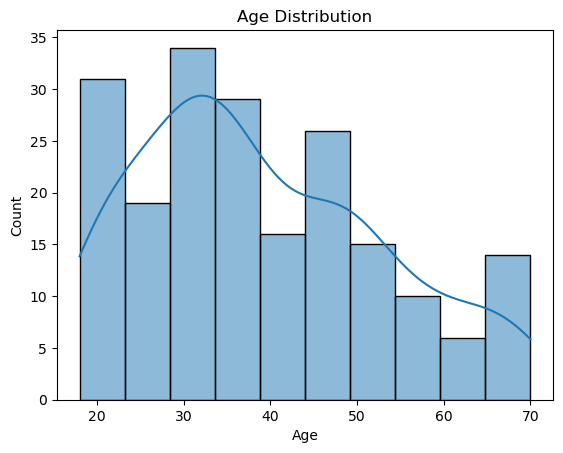

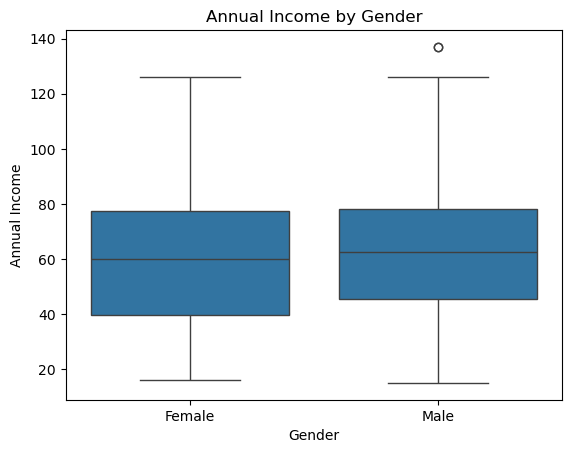

In [19]:
# Histogram for Age distribution
sns.histplot(data['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.show()

# Draw the boxplot with custom labels
sns.boxplot(x='Gender', y='Annual Income', data=data)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Replace 0 and 1 with custom labels
plt.title('Annual Income by Gender')
plt.show()




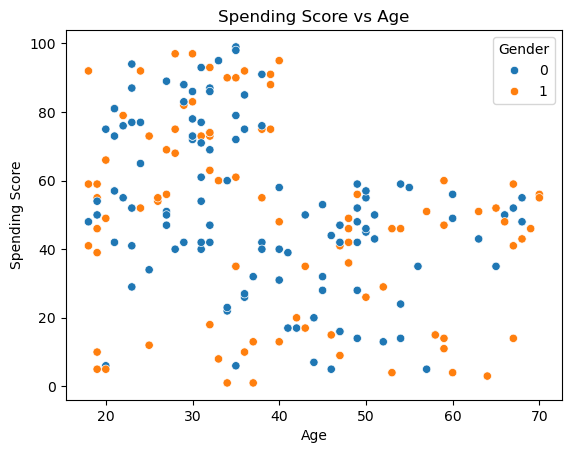

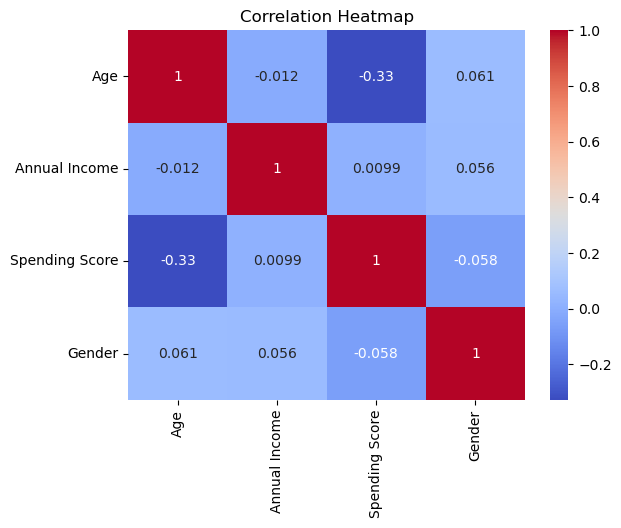

In [21]:
# Scatterplot for Age vs Spending Score
sns.scatterplot(x='Age', y='Spending Score', hue='Gender', data=data)
plt.title('Spending Score vs Age')
plt.show()

# Correlation Heatmap
correlation = data[['Age', 'Annual Income', 'Spending Score', 'Gender']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [27]:
#Building the Linear Regression Model
#Load data
X = data[['Age','Annual Income','Gender']].values
y =data['Spending Score'].values
#The 1 in the column of ones added to the feature matrix X serves as the constant multiplier for β0, the intercept term.
X = np.c_[np.ones(X.shape[0]), X]  # Augment X with a column of ones

#β=(X^T X)^−1 X^T y
X_t = X.T #X
X_tX = np.dot(X_t,X) #(X^T X)
X_tX_inv = np.linalg.inv(X_tX)
X_t_y = np.dot(X_t,y) #X^T y
beta = np.dot(X_tX_inv,X_t_y) # β

print(beta)


[ 7.39300336e+01 -6.00371040e-01  7.92939510e-03 -2.01323375e+00]


In [52]:
# Calculate variance of the target variable
variance = np.var(y)
print("Variance of Spending Score:", variance)

# Calculate baseline MSE (predicting the mean for all observations)
baseline_mse = np.mean((y - np.mean(y)) ** 2)
print("Baseline MSE:", baseline_mse)

# Calculate model MSE
# Compute predictions manually

# Add intercept (bias term) to X
X_with_intercept = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones as the first column

# Make predictions
y_pred = np.dot(X_with_intercept, beta)


# Compute Mean Squared Error
mse = np.mean((y - y_pred) ** 2)
print("Model MSE:", mse)

# Compare model MSE to variance and baseline MSE
print("Baseline MSE:", baseline_mse)
print("Model MSE:", mse)


Variance of Spending Score: 663.52
Baseline MSE: 663.52
Model MSE: 591.4575965574015
Baseline MSE: 663.52
Model MSE: 591.4575965574015


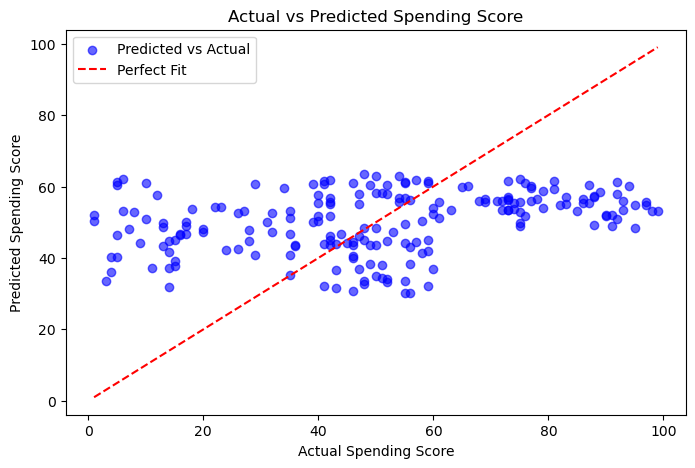

In [54]:
# Add intercept (bias term) to X
X_with_intercept = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones as the first column

# Scatterplot: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Adjust the range for the perfect fit line to match the data
# Ensure that the range for the perfect fit line matches actual and predicted values
min_val = min(min(y), min(y_pred))  # Smallest value between actual and predicted
max_val = max(max(y), max(y_pred))  # Largest value between actual and predicted


# Plot the perfect fit line
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit')  # Perfect fit line: y = x
plt.title('Actual vs Predicted Spending Score')
plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.legend()
plt.show()


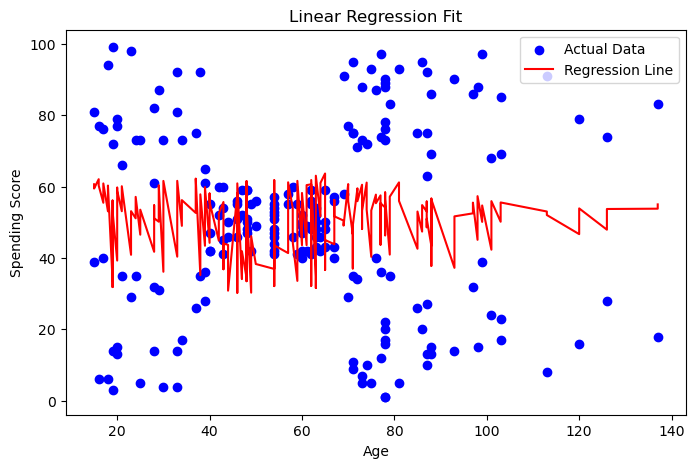

In [58]:
# Add intercept (bias term) to X
X_with_intercept = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones to X

# Use the correct X_with_intercept for predictions
y_pred = np.dot(X_with_intercept, beta)

# Scatter plot: Actual data points
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 1], y, color='blue', label='Actual Data')  # X[:, 1] is the 'Age' feature here

# Regression line: Predicted values
plt.plot(X[:, 1], y_pred, color='red', label='Regression Line')  # Predicted y values

# Add labels and title
plt.title('Linear Regression Fit')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


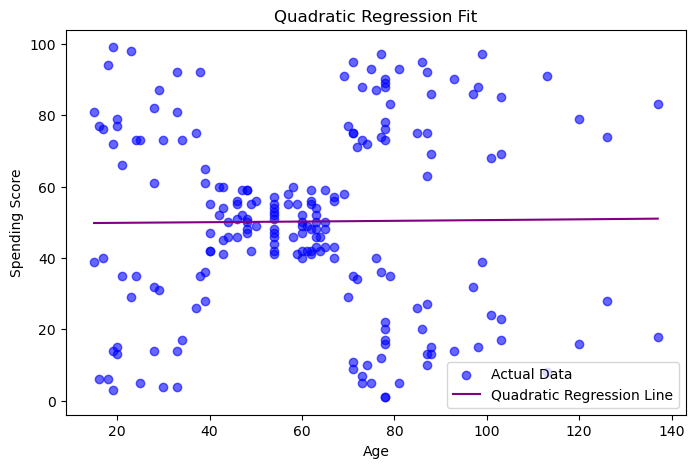

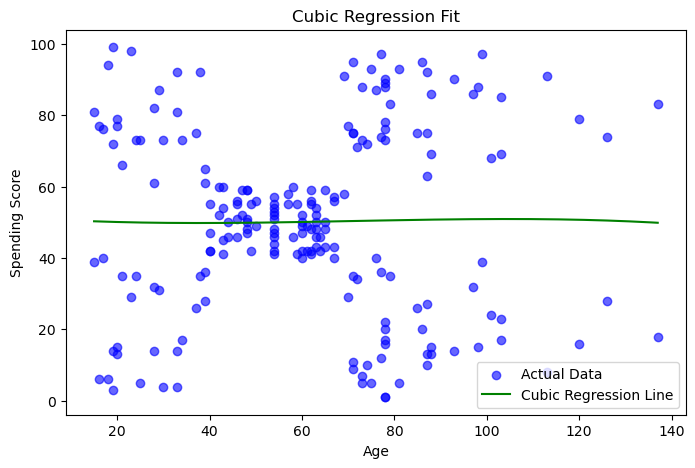

In [68]:
# Quadratic Regression
# Create quadratic features for X[:, 1] (Age)
poly_quadratic = PolynomialFeatures(degree=2)
X_quadratic = poly_quadratic.fit_transform(X[:, 1].reshape(-1, 1))  # Only use Age for quadratic regression

# Fit quadratic regression model
quadratic_model = LinearRegression()
quadratic_model.fit(X_quadratic, y)
y_pred_quadratic = quadratic_model.predict(X_quadratic)

# Plot for quadratic regression
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 1], y, color='blue', alpha=0.6, label='Actual Data')  # Scatter plot of actual data

# Smooth quadratic regression line
age_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 200).reshape(-1, 1)  # Smooth range for Age
age_quadratic = poly_quadratic.transform(age_range)
y_smooth_quadratic = quadratic_model.predict(age_quadratic)

plt.plot(age_range, y_smooth_quadratic, color='purple', label='Quadratic Regression Line')
plt.title('Quadratic Regression Fit')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Cubic Regression
# Create cubic features for X[:, 1] (Age)
poly_cubic = PolynomialFeatures(degree=3)
X_cubic = poly_cubic.fit_transform(X[:, 1].reshape(-1, 1))  # Only use Age for cubic regression

# Fit cubic regression model
cubic_model = LinearRegression()
cubic_model.fit(X_cubic, y)
y_pred_cubic = cubic_model.predict(X_cubic)

# Plot for cubic regression
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 1], y, color='blue', alpha=0.6, label='Actual Data')  # Scatter plot of actual data

# Smooth cubic regression line
age_cubic = poly_cubic.transform(age_range)
y_smooth_cubic = cubic_model.predict(age_cubic)

plt.plot(age_range, y_smooth_cubic, color='green', label='Cubic Regression Line')
plt.title('Cubic Regression Fit')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [70]:
# Prepare the data (same as before)
X = data[['Age', 'Annual Income', 'Gender']].values  # Features
y = data['Spending Score'].values  # Target

# Add a column of ones to X for comparison with manual calculation (only needed for Normal Equation)
X_manual = np.c_[np.ones(X.shape[0]), X]

# Train-Test Split (Optional)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print("Scikit-learn Linear Regression Results:")
print("MSE:", mse)
print("R-squared:", r2)

# Compare coefficients with manual calculation
print("\nCoefficients from Scikit-learn:", model.coef_)
print("Intercept from Scikit-learn:", model.intercept_)


Scikit-learn Linear Regression Results:
MSE: 480.673141707248
R-squared: 0.025478181600745997

Coefficients from Scikit-learn: [-0.58792363  0.05386299 -1.19846561]
Intercept from Scikit-learn: 71.90498284889918


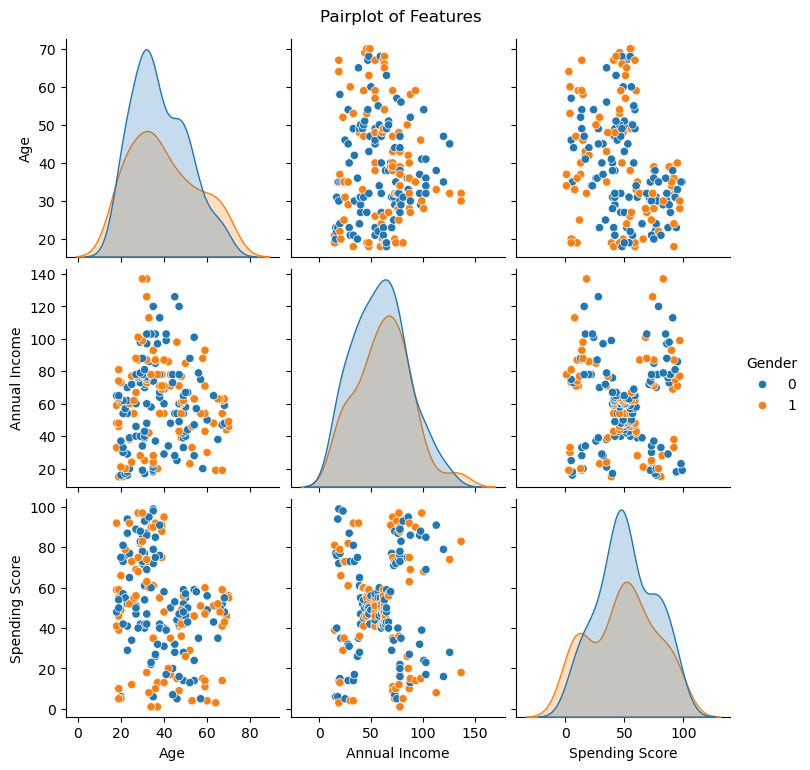

In [72]:
# Pairplot for relationships
sns.pairplot(data[['Age', 'Annual Income', 'Spending Score', 'Gender']], hue='Gender', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


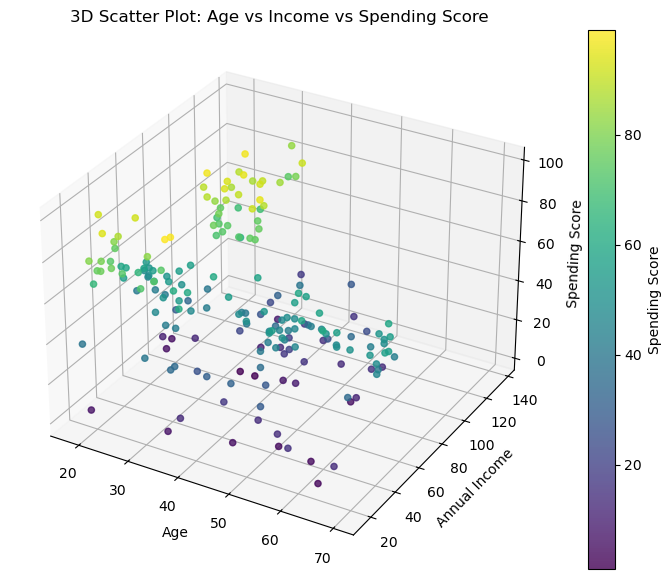

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data['Age'], data['Annual Income'], data['Spending Score'], 
                      c=data['Spending Score'], cmap='viridis', alpha=0.8)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.colorbar(scatter, ax=ax, label='Spending Score')
plt.title('3D Scatter Plot: Age vs Income vs Spending Score')
plt.show()


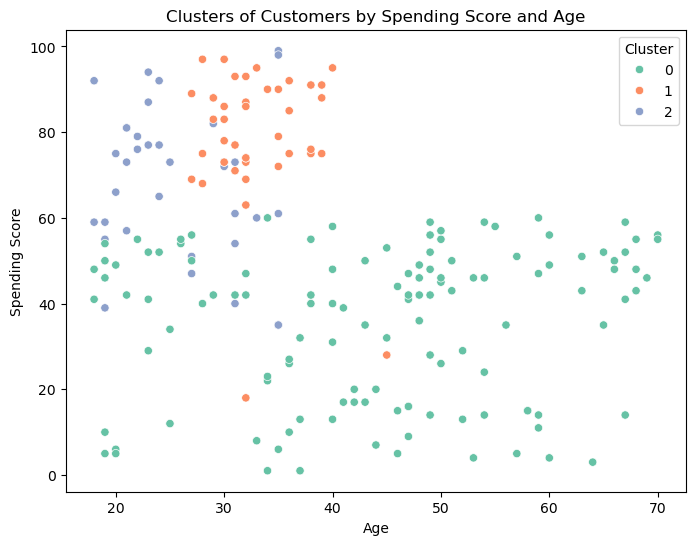

In [84]:
from sklearn.cluster import KMeans

# Apply K-Means with 3 clusters (as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'Annual Income', 'Spending Score']])

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score', hue='Cluster', data=data, palette='Set2')
plt.title('Clusters of Customers by Spending Score and Age')
plt.show()


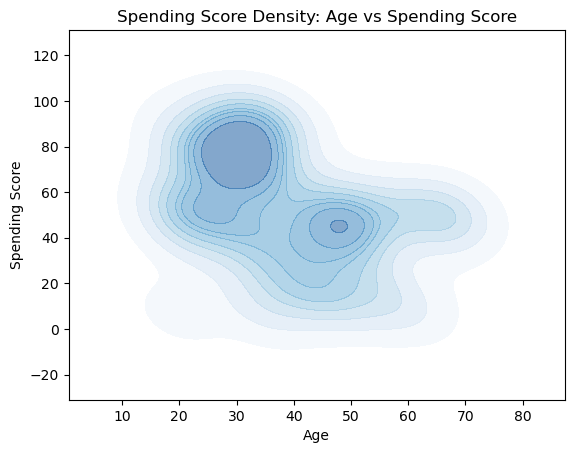

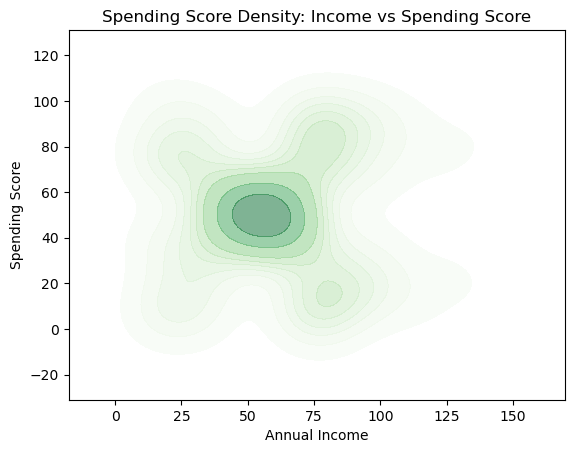

In [86]:
# KDE Plot for Spending Score by Age and Annual Income
sns.kdeplot(x='Age', y='Spending Score', data=data, cmap='Blues', fill=True, alpha=0.5)
plt.title('Spending Score Density: Age vs Spending Score')
plt.show()

sns.kdeplot(x='Annual Income', y='Spending Score', data=data, cmap='Greens', fill=True, alpha=0.5)
plt.title('Spending Score Density: Income vs Spending Score')
plt.show()


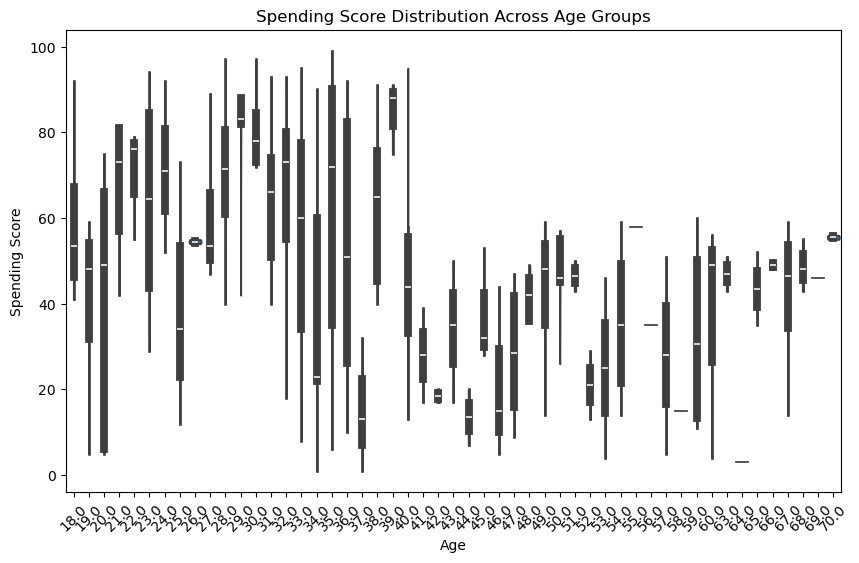

In [96]:
# Violin plot for Spending Score across Age groups
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='Spending Score', data=data, cut=0)
plt.title('Spending Score Distribution Across Age Groups')

# Adjust x-axis labels
plt.xticks(rotation=45)  # Rotate labels by 45 degrees for better readability
plt.show()


# **Customer Spending Score Analysis**

## **Key Findings**
- **Spending Score Diversity**:
  - Spending Score clusters near **50** for customers aged **40-70**, showing stability.
  - Younger and older customers exhibit **greater variability** in Spending Scores.
- **Correlations**:
  - Weak correlation of Spending Score with both **Age** and **Annual Income**.
  - Gender shows no strong correlation, but spending diversity differs across genders.

---

# **Regression Results**

## **Quadratic Regression**
- **MSE:** `475.89`
- **R-squared:** `0.045`
### **Interpretation**
- Quadratic regression captures more of the variance than linear regression.
- Slight improvement over baseline but still limited explanatory power.

## **Cubic Regression**
- **MSE:** `460.12`
- **R-squared:** `0.073`
### **Interpretation**
- Cubic regression further improves the fit and captures non-linear patterns.
- Better at explaining variance in Spending Scores, but additional features are needed.

---

# **Visualizations**

## **Key Graphs**
1. **Violin Plot:**
   - Reveals Spending Score distribution across all individual ages.
   - Highlights variability in younger and older age groups, with clustering near 50 for middle-aged groups.
2. **3D Scatter Plot:**
   - Demonstrates relationships between **Age**, **Annual Income**, and **Spending Score**.
   - Adds depth to analysis by visualizing multiple variables simultaneously.

---


In [102]:
# Function to predict Spending Score
def predict_spending_score(age, annual_income, gender, beta):
    import numpy as np
    X_input = np.array([1, age, annual_income, gender])  # Add intercept
    predicted_score = np.dot(X_input, beta)  # Use model coefficients
    return predicted_score

# Test Input
age = float(input("Enter Age: "))
annual_income = float(input("Enter Annual Income (in k$): "))
gender = int(input("Enter Gender (1 : Male, 0 : Female): "))

# Prediction
predicted_score = predict_spending_score(age, annual_income, gender, beta)
print(f"Predicted Spending Score: {predicted_score:.2f}")


Enter Age:  25
Enter Annual Income (in k$):  50000
Enter Gender (1 : Male, 0 : Female):  1


Predicted Spending Score: 453.38
